#위키피디아의 [훈민정음] 텍스트 데이터를 활용하여 워드클라우드 생성하기



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##1.자연어 처리를 위한 라이브러리 설치 및 한글 폰트 설치
pip install konlpy : 자연어 처리를 위한 라이브러리 설치


---


*참고:pip install konlpy를 실행할때 오류가 생기는 경우
*  코드셀에 해당 명령어 외에 주석이 있을경우(주석삭제)
*  프로그램 중간쯤에서 실행하는 경우(항상 제일 처음에 실행)





In [ ]:
pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 40.9 MB/s eta 0:00:00


In [ ]:
#한글을 지원하기 위한 한글 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,909 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and dire

##2.텍스트 화일과 이미지 화일 업로드하기
- 훈민정음.txt
- mask_rabbit.png



In [ ]:
#화일을 업로드하기 위한 소스 코드
#드라이브 마운트 한후 드래그&드롭으로 파일을 업로드해도 됨

#from google.colab import files
#files.upload()

##3.필요한 라이브러리들 로딩하기

*  워드 클라우드 생성에 필요한 라이브러리들(wordcloud, STOPWORDS, matplotlib)
*   마스크 이미지 처리를 위해 필요한 라이브러리들(Image, numpy)

In [ ]:
# 워드 클라우드 생성에 필요한 라이브러리들(wordcloud, STOPWORDS, matplotlib)
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

#마스크 이미지 처리를 위해 필요한 라이브러리들(Image, numpy)
from PIL import Image
import numpy as np

##4.관련 화일들 open 하고 저장하기

In [ ]:
# 워드 클라우드에 사용될 텍스트 준비과정
    # 워드 클라우드 생성을 위한 텍스트 화일을 열어 읽어오기
    # 파일변수명 = open('화일명', 'r', encoding='UTF8')  : 텍스트 화일 열기
    # 텍스트변수명 = 파일변수명.read()        : 텍스트 화일에 있는 데이터 읽어오기

fp = open('/content/drive/MyDrive/Colab Notebooks/진선우WS1/8주차/훈민정음.txt','r', encoding='UTF8') #파일열기, 옵션이 없어도 잘 읽어옴
text = fp.read() #파일 읽어오기
text # 변수의 내용확인

"『훈민정음』(訓民正音, 중세 한국어: 훈민정음)은 한글의 옛 이름(첫 이름)으로 세종대왕이 창제한 문자의 명칭이자 훈민정음의 창제 원리와 사용법 등을 해설해 놓은 책의 제목이기도 하다. 세종 25년(1443년)에 창제 된 후 1446년(세종 28년)에 반포된 훈민정음의 뜻은 '백성(民)을 가르치는(訓) 바른(正) 소리(音)'이며, 28개의 낱자로 구성되어 있다. 소리글자에 속하며, 배우기 쉽고 읽고 쓰기에 편리한 장점을 가지고 있다. 이 훈민정음이 우리가 지금 사용하고 있는 한글이며, 훈민정음은 1446년에 정식으로 반포됐고 한글이란 이름은 주시경에 의해 지어진 것으로 알려져 있다.[1][2][3][4][5]\n\n훈민정음은 반포된 초기에 '정음(正音)'으로도 불리었고 그밖에도 언문(諺文), 언서(諺書), 반절(反切), 암클, 아햇글 등으로 불리우면서[6] 양반들에 의해 홀대 받았다. 그러나 한자에 비해서 배우기 쉽고 읽고 쓰기가 쉬웠기 때문에 널리 보급되어 오늘날에는 한국어를 표기하는 공식문자가 되었다.\n\n세종대왕은 훈민정음을 창제한후에 궁중에 성삼문, 신숙주, 최항, 정인지, 박팽년 등 집현전 학자들에게 명하여 해설서인 『훈민정음 해례본(訓民正音 解例本)』을 발간하도록 했다. 그러나 불행하게도 '훈민정음 해례본'은 기록에만 존재할뿐 한 권도 전해지지 않았었는데, 1940년 경상도 안동에서 약 500년만에 처음 발견되었으며 현재에는 서울 간송미술관에 소장되어 있다.[7] 해례본은 1962년에 국보 70호로 지정되었으며 1997년에 유네스코 세계기록유산으로 지정되었다.\n\n역사\n1443년(세종 25년) 12월에 훈민정음 28자가 창제되었다. 세종은 성삼문, 신숙주, 최항, 정인지, 박팽년 등 집현전 학자들에게 해설서인 『훈민정음 해례본(訓民正音 解例本)』 발간과 <동국정운>을 편찬하도록 했으며 최항과 박팽년에게 『고금운회거요』의 번역을 명했다.[8] 1445년(세종 27) 4월에는 훈민정음을 사용하여 악장(樂章)인 『용비어천가』 를 편찬사업을 진행하였

In [ ]:
# 워드 클라우드에 사용될 마스크 준비과정(2개필요→ 훈민정음, 생활물가지수에 각각 사용)
    # 마스크 이미지 화일 읽어와서 array로 변경하기
    # 마스크변수명 = np.array(Image.open('마스크이미지화일명'))

mask_cat = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/진선우WS1/8주차/mask_cat.png'))  #고양이 마스크
mask_rabbit = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/진선우WS1/8주차/mask_rabbit.png'))  # 토끼 마스크

##5.자연어 처리하기

In [ ]:
#한글 자연어처리를 위한 konlpy 라이브러리 로딩하기
#Okt(Twitter)를 이용한 형태소 분석에 사용
from konlpy.tag import Okt

#Okt 라이브러리를 사용하기 위한 객체 생성
#변수명 = Okt()
t = Okt()

#문자열에서 명사만 추출하기
#변수명.nouns(문자열)
명사 = t.nouns(text) #문자열에서 명사만 추출, 문자열에는 문자열이 들어간 변수명 써도 됨,
명사 #변수의 내용 확인

['훈민정음',
 '중세',
 '한국어',
 '훈민정음',
 '은',
 '한글',
 '이름',
 '첫',
 '이름',
 '세종대왕',
 '창제',
 '문자',
 '명칭',
 '이자',
 '훈민정음',
 '창제',
 '원리',
 '용법',
 '등',
 '해설',
 '책',
 '제목',
 '세종',
 '창제',
 '후',
 '세종',
 '반포',
 '훈민정음',
 '뜻',
 '백성',
 '소리',
 '개',
 '낱자',
 '구성',
 '소리글자',
 '속',
 '쓰기',
 '장점',
 '가지',
 '이',
 '훈민정음',
 '우리',
 '지금',
 '사용',
 '한글',
 '훈민정음',
 '정식',
 '반포',
 '한글',
 '이름',
 '주시경',
 '것',
 '훈민정음',
 '반포',
 '초기',
 '정음',
 '그',
 '언문',
 '반절',
 '암클',
 '햇글',
 '등',
 '양반',
 '홀',
 '한자',
 '비',
 '쓰기',
 '때문',
 '널리',
 '보급',
 '오늘날',
 '한국어',
 '표기',
 '공식',
 '문자',
 '세종대왕',
 '훈민정음',
 '창제',
 '후',
 '궁',
 '성삼문',
 '신숙주',
 '최항',
 '정인지',
 '박팽년',
 '등',
 '집현전',
 '학자',
 '명',
 '해설',
 '서인',
 '훈민정음',
 '해례본',
 '발간',
 '훈민정음',
 '해례본',
 '은',
 '기록',
 '존재',
 '뿐',
 '권',
 '경상도',
 '안동',
 '약',
 '처음',
 '발견',
 '현재',
 '서울',
 '간송',
 '미술관',
 '소장',
 '해례본',
 '국보',
 '호로',
 '지정',
 '유네스코',
 '세계',
 '기록',
 '유산',
 '지정',
 '역사',
 '세종',
 '훈민정음',
 '자가',
 '창제',
 '세종',
 '성삼문',
 '신숙주',
 '최항',
 '정인지',
 '박팽년',
 '등',
 '집현전',
 '학자',
 '해설',
 '서인',
 '훈민정음',
 '해례본',
 '발간'

In [ ]:
#워드클라우드에서 사용한 명사들을 문자열로 변환하기

strData = ""

for n in 명사:
    strData = strData + n + " "
strData

'훈민정음 중세 한국어 훈민정음 은 한글 이름 첫 이름 세종대왕 창제 문자 명칭 이자 훈민정음 창제 원리 용법 등 해설 책 제목 세종 창제 후 세종 반포 훈민정음 뜻 백성 소리 개 낱자 구성 소리글자 속 쓰기 장점 가지 이 훈민정음 우리 지금 사용 한글 훈민정음 정식 반포 한글 이름 주시경 것 훈민정음 반포 초기 정음 그 언문 반절 암클 햇글 등 양반 홀 한자 비 쓰기 때문 널리 보급 오늘날 한국어 표기 공식 문자 세종대왕 훈민정음 창제 후 궁 성삼문 신숙주 최항 정인지 박팽년 등 집현전 학자 명 해설 서인 훈민정음 해례본 발간 훈민정음 해례본 은 기록 존재 뿐 권 경상도 안동 약 처음 발견 현재 서울 간송 미술관 소장 해례본 국보 호로 지정 유네스코 세계 기록 유산 지정 역사 세종 훈민정음 자가 창제 세종 성삼문 신숙주 최항 정인지 박팽년 등 집현전 학자 해설 서인 훈민정음 해례본 발간 동국정운 편찬 최항 박팽년 고금 운회거 의 번역 명 세종 훈민정음 사용 악장 인 용비어천가 를 편찬 사업 진행 최만리 석조 김문 하위지 정창손 등 집현전 내 훈민정음 반포 반대 학자 가지 이유 상소 때 상소 집현전 학자 대표 격 부제학 최만리 한글 반포 대해 크게 반대 세종 노여움 사 책망 투옥 그 다음 날 석방 사직 낙향 음력 훈민정음 반포 훈민정음 해례본 이 간행 이 책 훈민정음 창제 목적 원리 용법 등 상세 설명 세종 하급 관리 때 훈민정음 시험 과목 추가 삼강 행실 과 국가 윤리 훈민정음 백성 이 가지 사항 조선 최고 법전 경국대전 명문 사서 를 훈민정음 번역 백성 관가 제출 서류 훈민정음 작성 형률 적용 과정 그 내용 훈민정음 번역 도록 궁 여인 모두 훈민정음 세종 자신 조정 대신 기관 훈민정음 글 리기 이후 민간 조정 일부 문서 훈민정음 사용 훈민정음 보급 정책 훈민정음 점차 '

##6.워드 클라우드 생성하기

In [ ]:
#한글 폰트 경로 저장하기
path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"

#불용어로 처리한 단어들 추가하기
#변수명 = STOPWORDS.union({'단어들'})
s_words = STOPWORDS.union({"날","뿐","투옥","의","첫","사","속","홀","과","인","후","약","권","그","격","내","개"})
s_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

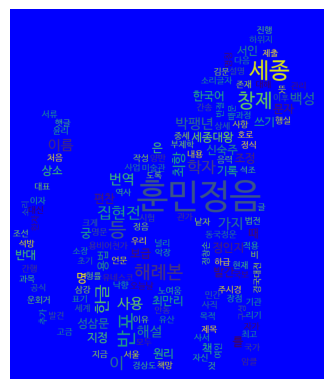

In [ ]:
#워드클라우드의 속성 지정하기 → 밑줄은 해당 내용이 있는 변수명으로 채우기, " "안에는 원하는 색상 넣기
wordcloud = WordCloud(stopwords = s_words,
                      font_path = path,
                      mask=mask_cat,
                      background_color='blue',
                      max_words=150)

#워드클라우드 생성하기
#변수명.generate(텍스트변수명)
wordcloud.generate(strData)

#워드클라우드 이미지 출력하기
#plt.imshow(변수명)
plt.imshow(wordcloud)

#x, y축 눈금 숨기기
#plt.axis('off')
plt.axis('off')

plt.show()

#공공데이터의 빈도수를 활용하여 워드클라우드 생성하기
2023년 생활물가지수.csv 자료를 활용하여 2023년 상반기 생활물가지수 중 가장 높은 품목을 워드클라우드로 표현해보자.
*  URL: https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1J20005&conn_path=I2
*  출처:통계청,「소비자물가조사」, 2023.07, 2023.09.01, 생활물가지수(2020=100)


##1.데이터 및 파일 준비하기

In [ ]:
#데이터 관리와 정제를 위한 라이브러리 포함
import pandas as pd

#csv 화일 읽어오기
#변수명 = pd.read_csv(화일명, encoding=‘인코딩방식’)
생활물가지수=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/진선우WS1/8주차/생활물가지수(2023년 상반기).csv', encoding="EUC-KR")
생활물가지수

,시도별,품목별,2023.02,2023.03,2023.04,2023.05,2023.06,2023.07
0,전국,총지수,110.38,110.56,110.80,111.13,111.12,111.20
1,전국,생활물가지수,112.19,112.33,112.55,113.00,112.99,112.96
2,전국,식품,115.71,116.34,116.38,116.85,117.04,117.89
3,전국,쌀,94.57,93.99,93.46,94.05,94.38,95.58
4,전국,국수,158.70,158.42,156.60,148.97,147.74,152.29
...,...,...,...,...,...,...,...,...
146,전국,보험서비스료,135.80,135.80,142.36,142.36,142.36,142.36
147,전국,자동차보험료,99.07,97.06,97.06,97.06,97.06,97.06
148,전국,전월세,103.90,103.85,103.82,103.76,103.69,103.64
149,전국,생활물가 이외,109.51,109.82,110.14,110.40,110.42,110.71


In [ ]:
#csv 행열 정보 확인하기

생활물가지수.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시도별      151 non-null    object 
 1   품목별      151 non-null    object 
 2   2023.02  151 non-null    float64
 3   2023.03  151 non-null    float64
 4   2023.04  151 non-null    float64
 5   2023.05  151 non-null    float64
 6   2023.06  151 non-null    float64
 7   2023.07  151 non-null    float64
dtypes: float64(6), object(2)
memory usage: 9.6+ KB


##2.정형 데이터를 open 하고 딕셔너리 자료구조로 변환하기

In [ ]:
#정형 데이터를 딕셔너리 자료구조로 변환하기 (2023.07월 자료)
#변수명.set_index('키 열이름').to_dict()['값 열이름']
dicData = 생활물가지수.set_index('품목별').to_dict()['2023.07']
dicData

{'총지수': 111.2,
 '생활물가지수': 112.96,
 '식품': 117.89,
 '쌀': 95.58,
 '국수': 152.29,
 '라면': 121.13,
 '두부': 117.13,
 '빵': 129.56,
 '떡': 116.69,
 '국산쇠고기': 101.98,
 '수입쇠고기': 122.2,
 '돼지고기': 121.78,
 '닭고기': 139.66,
 '햄및베이컨': 115.5,
 '기타육류가공품': 132.55,
 '고등어': 119.37,
 '오징어': 107.55,
 '조개': 115.94,
 '어묵': 131.73,
 '우유': 116.55,
 '발효유': 117.5,
 '달걀': 132.28,
 '참기름': 134.43,
 '식용유': 155.24,
 '사과': 137.15,
 '포도': 154.22,
 '귤': 147.33,
 '수박': 130.8,
 '바나나': 118.51,
 '배추': 93.22,
 '상추': 165.36,
 '시금치': 161.23,
 '깻잎': 112.11,
 '부추': 88.25,
 '무': 95.14,
 '당근': 102.04,
 '감자': 108.74,
 '콩나물': 113.06,
 '버섯': 104.56,
 '오이': 119.86,
 '풋고추': 113.79,
 '호박': 92.81,
 '토마토': 89.24,
 '파': 112.14,
 '양파': 105.01,
 '마늘': 129.33,
 '김': 108.31,
 '사탕': 113.88,
 '아이스크림': 118.99,
 '비스킷': 124.93,
 '스낵과자': 115.36,
 '파이': 112.89,
 '소금': 149.93,
 '간장': 119.9,
 '밑반찬': 108.96,
 '냉동식품': 112.5,
 '즉석식품': 119.78,
 '편의점도시락': 107.47,
 '삼각김밥': 105.91,
 '커피': 124.15,
 '주스': 117.83,
 '두유': 121.91,
 '생수': 112.24,
 '탄산음료': 113.92,
 '소주': 11

##3.워드 클라우드 생성하기

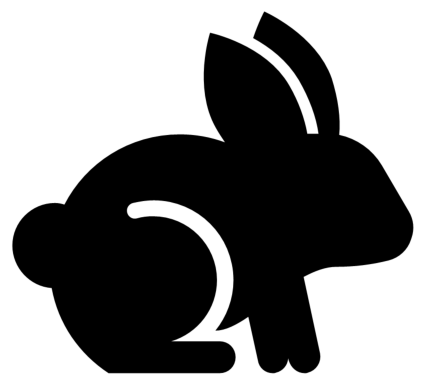

In [ ]:
#워드클라우드의 속성 지정하기
wordcloud = WordCloud(font_path = path,
                       mask= mask_rabbit,
                       background_color= "white",
                      max_words = 150)

#딕셔너리 데이터를 활용하여 워드클라우드 생성하기
#변수명.generate_from_frequencies(dictionary구조)
wordcloud.generate_from_frequencies(dicData)

#워드클라우드 이미지 출력하기
plt.imshow(wor)

#x, y축 눈금 숨기기
#plt.axis('off')
plt.axis('off')

plt.show()